In [10]:
import SIA_sigma as sia
import matplotlib.pylab as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
from vialov import vialov

### Variables

In [11]:
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 1e-16    # a^-1 Pa^-3 
g = 9.81        # m s^-2

### Discretization

In [12]:
# grid in x dir.
delta_x = 100
x_lim =16000        # L in Vialov Profil
x = np.arange(0,x_lim+delta_x,delta_x)

# time 
t_0=0
N=int(4e04)    # Nr. of time steps
delta_t=0.005

### Ice Sheet Geometry

In [13]:
# SMB 
a_s = 0.3#0.03 # m/a
via = vialov(x,x_lim,a_s,n,A,rho,g)

# Surface profile and bed
surface = via  #-0.001*x**2+20 #5*np.ones(np.size(x)) -0.00005*x**2+4000
#surface[len(surface)-1]=0
cut=2
x = x[0:len(x)-cut]
surface = surface[0:len(surface)-cut]
via=via[0:len(via)-cut]
bed = 0*x_lim/200*np.cos(10/x_lim*x*np.pi)
boundary = np.array(((1,0),(1,-a_s*(x_lim-cut*delta_x))))

### Calculate inner velocities

In [14]:
nz=40
end = len(surface)
v_x,v_z,Z,sigma=sia.velocity_inner(bed, surface,A,g,rho, delta_x,nz, n, end)

#### Plot Grid in cartesian and sigma coord.

[(0.0, 15900.0)]

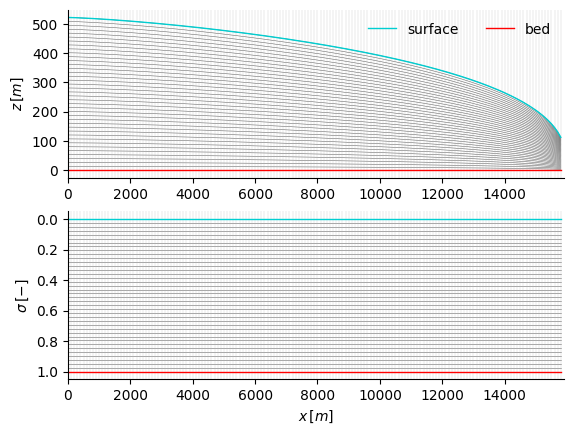

In [15]:
fig,ax=plt.subplots(2)

for i in range(len(Z)):
    ax[0].plot(x,Z[i],"-",color=(0.4,0.4,0.4),linewidth=0.4)
for i in range(len(x)):  
    ax[0].axvline(x[i],linestyle="-",color=(0.7,0.7,0.7),linewidth=0.2)
ax[0].plot(x,surface,"-", color=(0/255,206/255,209/255),label="surface",linewidth=1)
ax[0].plot(x,bed,"-r",label="bed",linewidth=1)
ax[0].set(ylabel=r"$z\,[m]$")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set(xlim=[0,16000-100])
ax[0].legend(frameon=False, loc='upper right', ncol=2)


for i in range(1,len(Z)-1):
    ax[1].plot(x[:len(x)],sigma[i],"-",color=(0.4,0.4,0.4),linewidth=.4)
for i in range(len(x)):  
    ax[1].axvline(x[i],ymin=0,ymax=1,linestyle="-",color=(0.7,0.7,0.7),linewidth=0.2)  
ax[1].plot(x,sigma[len(sigma)-1,:],"-", color=(0/255,206/255,209/255),label="surface",linewidth=1)
ax[1].plot(x,sigma[0,:],"-r",label="bed",linewidth=1)
plt.gca().invert_yaxis()
ax[1].set(xlabel=r"$x\,[m]$",ylabel=r"$\sigma\,[-]$")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set(xlim=[0,16000-100])
# ax[1].legend(frameon=False, loc='lower center', ncol=2)
#plt.savefig(".\\Abbildungen\\sigma_coords.pdf")


### Plot initial velocities

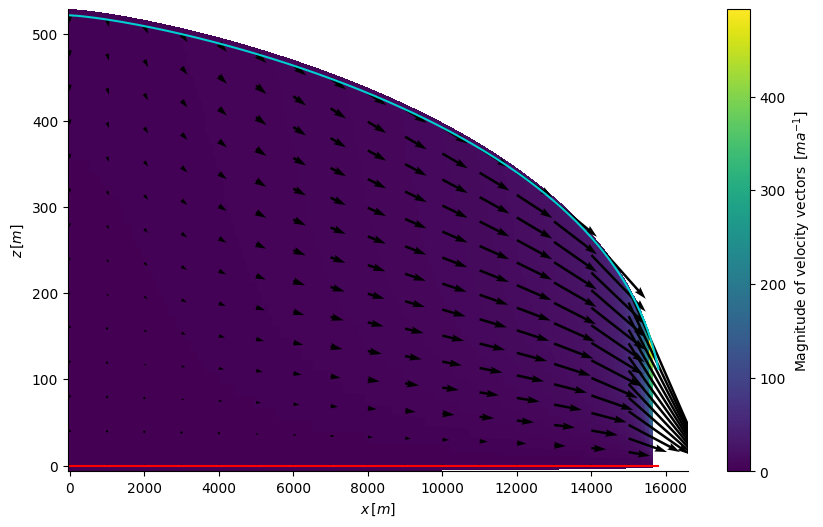

In [16]:
Z_new=np.array([Z[i,:len(Z[0])-2] for i in range(len(Z))])
X = np.array(np.tile(x[:len(x)-2],(len(Z),1)))
for i in range(1,len(Z)):
    v_z[i,:]=v_z[i,:end-2]*delta_x/(Z[i,:end-2]-Z[i-1,:end-2])
v_x_new=np.array([np.array(v_x[i,:len(v_x[0])-1] )for i in range(len(v_x))])
v_z=np.array(v_z)
skip = (slice(None, None, 3), slice(None, None,10))
mag = (v_x_new**2+v_z**2)**(1/2)

fig,ax=plt.subplots(figsize=(10,6))
cp=ax.pcolor(X,Z_new,mag)
#ax.streamplot(X,Z_new,v_x_new,v_z,color="k",linewidth=0.6)
ax.quiver(X[skip],Z_new[skip],v_x_new[skip],v_z[skip])
plt.colorbar(cp,label=r"Magnitude of velocity vectors $\,[ma^{-1}]$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xlabel=r"$x\,[m]$",ylabel=r"$z\,[m]$")
plt.plot(x,surface,"-", color=(0/255,206/255,209/255))
plt.plot(x,bed,"-r")
plt.savefig(".\\Test_Results\\sigma\\vx_flatBed")


#### Calculate evolution with time

In [17]:
# sol_h, sol_vx,sol_vz, Q, Zp, sigmap,timesteps = sia.solution(bed, surface, boundary, a_s, delta_x, nz, delta_t, t_0, N, n, rho, A, g)

In [18]:
# skip = (slice(None, None, 2), slice(None, None, 1))
# for i in range(0,10000,100):
#     fig,ax=plt.subplots(figsize=(10,6))
#     Z_new=np.array([Zp[i][j,:end-2] for j in range(len(Zp[i]))])
#     X = np.array(np.tile(x[:end-2],(len(Zp[i]),1)))    
#     v_x_new=np.array([np.array(sol_vx[i][j,:len(sol_vx[i][j])-1] )for j in range(len(sol_vx[i]))])
#     v_z=sol_vz[i]
#     for j in range(1,len(v_z)):
#         v_z[j,:]=v_z[j,:end-2]*delta_x/(Z_new[j,:]-Z_new[j-1,:])
#     mag = (v_x_new**2+v_z**2)**(1/2)
#     cp=ax.pcolormesh(X,Z_new,mag)
#     #ax.streamplot(X,Z_new,v_x_new,sol_vz[i],color="k",linewidth=0.6)
#     ax.quiver(X[skip],Z_new[skip],v_x_new[skip],v_z[skip])
#     plt.colorbar(cp,label=r"Magnitude of velocity vectors $[ma^{-1}]$")
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.set(xlabel=r"$x\,[m]$",ylabel=r"$z\,[m]$")
#     plt.plot(x,sol_h[i],"-", color=(0/255,206/255,209/255))
#     plt.plot(x,bed,"-r")
#     #plt.savefig(f".\\Test_Results\\v_inner_bumpy\\inner_v_bumpy_bed_{i}.png")
#     #plt.close(fig)